Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Jumlah Data yang Hilang:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabi

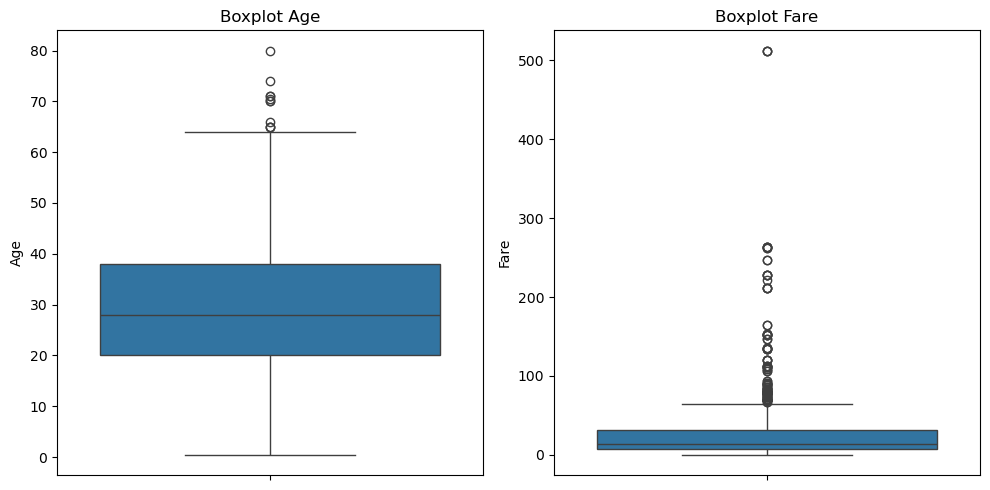

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Membaca Dataset 
file_path = r"C:\Users\aekmo\Downloads\LaprakdanProgram_Pembelajaran_Mesin_DP_N_Manajeman_Informasi\Titanic-Dataset.csv"
df = pd.read_csv(file_path)

#Menampilkan 5 data teratas
print("Informasi Dataset:")
print(df.info())

print("\nJumlah Data yang Hilang:")
print(df.isnull().sum())

#Menampilkan statistik deskriptif dari dataset 
print("\nStatistik Deskriptif:")
print(df.describe())

#Mendeteksi outlier pada dataset
numerical_cols = ['Age', 'Fare']
outliers = {}

for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

print("\nJumlah Outlier dalam Data:")
for col, outlier_data in outliers.items():
    print(f"{col}: {outlier_data.count()} outlier")

#Visualisasi boxplot dari dataset
plt.figure(figsize=(10, 5))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(1, 2, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

In [39]:
# Mengisi nilai yang hilang pada kolom 'Age' dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Mengisi nilai yang hilang pada kolom 'Embarked' dengan modus (nilai yang paling sering muncul)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Menghapus kolom 'Cabin' karena terlalu banyak data yang hilang
df.drop(columns=['Cabin'], inplace=True)

# Menampilkan jumlah data yang hilang setelah diatasi
print("\nJumlah Data yang Hilang Setelah Perbaikan:")
print(df.isnull().sum())


Jumlah Data yang Hilang Setelah Perbaikan:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\aekmo\AppData\Local\Temp\ipykernel_17856\299285437.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\aekmo\AppData\Local\Temp\ipykernel_17856\299285437.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [41]:
# Mengonversi kolom 'Sex' menjadi numerik (0 = Female, 1 = Male)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})

# Mengonversi kolom 'Embarked' ke One-Hot Encoding
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Menampilkan beberapa baris pertama setelah transformasi
print("\nDataset Setelah Konversi Data Kategorikal:")
print(df.head())


Dataset Setelah Konversi Data Kategorikal:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name  Sex   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris    1  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...    0  38.0      1      0   
2                             Heikkinen, Miss. Laina    0  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)    0  35.0      1      0   
4                           Allen, Mr. William Henry    1  35.0      0      0   

             Ticket     Fare  Embarked_Q  Embarked_S  
0         A/5 21171   7.2500       False        True  
1          PC 17599  71.2833       False       False  
2  STON/O2. 3101282   7.9250       False        True  
3            113803  53.1000    

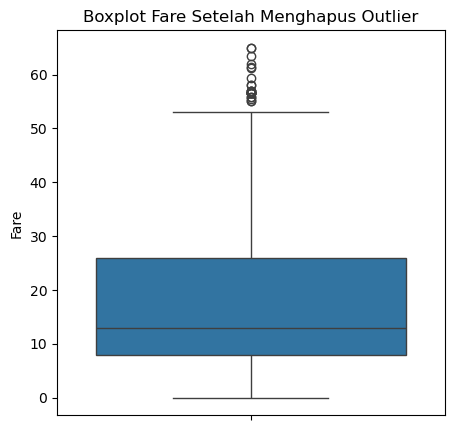

In [43]:
# Menghapus outlier pada kolom 'Fare' (harga tiket yang terlalu mahal)
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Menampilkan boxplot setelah menghapus outlier
plt.figure(figsize=(5, 5))
sns.boxplot(y=df['Fare'])
plt.title('Boxplot Fare Setelah Menghapus Outlier')
plt.show()

In [45]:
print("\nDataset Setelah Preprocessing:\n")
print(df.info()) 
print(df.head()) 


Dataset Setelah Preprocessing:

<class 'pandas.core.frame.DataFrame'>
Index: 775 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  775 non-null    int64  
 1   Survived     775 non-null    int64  
 2   Pclass       775 non-null    int64  
 3   Name         775 non-null    object 
 4   Sex          775 non-null    int64  
 5   Age          775 non-null    float64
 6   SibSp        775 non-null    int64  
 7   Parch        775 non-null    int64  
 8   Ticket       775 non-null    object 
 9   Fare         775 non-null    float64
 10  Embarked_Q   775 non-null    bool   
 11  Embarked_S   775 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(2)
memory usage: 68.1+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6        